# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import re
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import BaseEstimator,TransformerMixin
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 16

[nltk_data] Downloading package punkt to /home/aaron/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aaron/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aaron/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# load data from database
df = pd.read_sql_table('disaster_data', 'sqlite:///../data/DisasterResponse.db')  
X = df["message"]
y = df.drop(["message", "id", "original", "genre"], axis=1) 

### 2. Write a tokenization function to process your text data

In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def tokenize(text):
    # Unify URLs with a placeholder
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")
        
    # Split text into words
    tokens = nltk.word_tokenize(text)
    
    # Group inflected words, remove whitespace, transform all to lowercase
    lemmatizer = WordNetLemmatizer()
    clean_tokens = [lemmatizer.lemmatize(x).lower().strip() for x in tokens]
    
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [4]:
classifier = RandomForestClassifier()

pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),
    ])),

    ('clf', MultiOutputClassifier(classifier))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y);
model = pipeline;
model.fit(X_train, y_train);

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [6]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = y.columns)

In [7]:
accuracy = []
for col in y.columns:
    print(f"Category: {col}")
    report = classification_report(y_test[col],y_pred[col], output_dict=False)
    print(report)
    accuracy.append(classification_report(y_test[col],y_pred[col], output_dict=True)["accuracy"])

Category: related
              precision    recall  f1-score   support

       False       0.74      0.27      0.40      1579
        True       0.81      0.97      0.88      4975

    accuracy                           0.80      6554
   macro avg       0.77      0.62      0.64      6554
weighted avg       0.79      0.80      0.77      6554

Category: request
              precision    recall  f1-score   support

       False       0.89      0.99      0.94      5417
        True       0.89      0.45      0.59      1137

    accuracy                           0.89      6554
   macro avg       0.89      0.72      0.77      6554
weighted avg       0.89      0.89      0.88      6554

Category: offer
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6522
        True       0.00      0.00      0.00        32

    accuracy                           1.00      6554
   macro avg       0.50      0.50      0.50      6554
weighted avg       0.9

/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Category: money
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      6408
        True       0.60      0.02      0.04       146

    accuracy                           0.98      6554
   macro avg       0.79      0.51      0.51      6554
weighted avg       0.97      0.98      0.97      6554

Category: missing_people
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      6481
        True       0.00      0.00      0.00        73

    accuracy                           0.99      6554
   macro avg       0.49      0.50      0.50      6554
weighted avg       0.98      0.99      0.98      6554

Category: refugees
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      6333
        True       0.00      0.00      0.00       221

    accuracy                           0.97      6554
   macro avg       0.48      0.50      0.49      6554
weighted avg  

/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

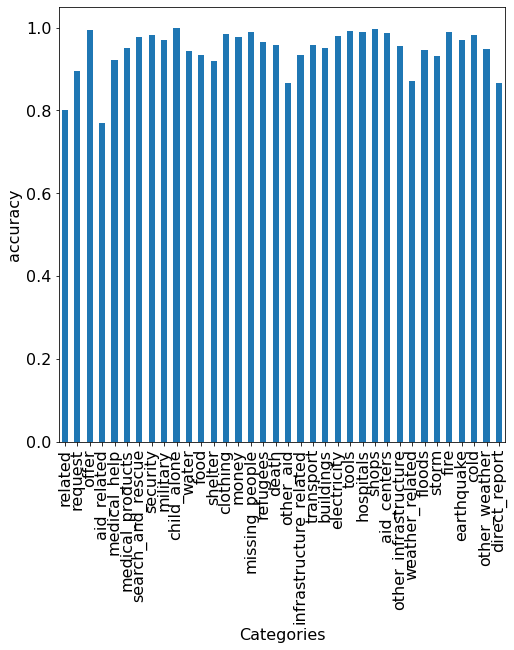

In [8]:
accuracy_df = pd.DataFrame(accuracy, list(y.columns), columns=["base"]);
accuracy_df.plot(kind="bar", legend=False, xlabel="Categories", ylabel="accuracy");

### 6. Improve your model
Use grid search to find better parameters. 

In [9]:
parameters = {
    'features__text_pipeline__tfidf__use_idf': (True, False),
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = y.columns)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [11]:
grid_search_accuracy = []
for col in y.columns:
    print(f"Category: {col}")
    report = classification_report(y_test[col],y_pred[col], output_dict=False)
    print(report)
    grid_search_accuracy.append(classification_report(y_test[col],y_pred[col], output_dict=True)["accuracy"])

Category: related
              precision    recall  f1-score   support

       False       0.74      0.27      0.39      1579
        True       0.81      0.97      0.88      4975

    accuracy                           0.80      6554
   macro avg       0.77      0.62      0.64      6554
weighted avg       0.79      0.80      0.76      6554

Category: request
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      5417
        True       0.89      0.46      0.60      1137

    accuracy                           0.90      6554
   macro avg       0.89      0.72      0.77      6554
weighted avg       0.89      0.90      0.88      6554

Category: offer
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6522
        True       0.00      0.00      0.00        32

    accuracy                           1.00      6554
   macro avg       0.50      0.50      0.50      6554
weighted avg       0.9

/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      6443
        True       0.60      0.05      0.10       111

    accuracy                           0.98      6554
   macro avg       0.79      0.53      0.55      6554
weighted avg       0.98      0.98      0.98      6554

Category: money
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      6408
        True       0.60      0.02      0.04       146

    accuracy                           0.98      6554
   macro avg       0.79      0.51      0.51      6554
weighted avg       0.97      0.98      0.97      6554

Category: missing_people
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      6481
        True       0.00      0.00      0.00        73

    accuracy                           0.99      6554
   macro avg       0.49      0.50      0.50      6554
weighted avg       0.98      0.99

/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaron/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
accuracy_df["grid_search"] = grid_search_accuracy

In [12]:
print(cv.best_params_)

{'features__text_pipeline__tfidf__use_idf': True}


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [13]:
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return True
        return False

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

In [14]:
classifier = RandomForestClassifier()

pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),
        
        ('starting_verb', StartingVerbExtractor())
    ])),

    ('clf', MultiOutputClassifier(classifier))
])

In [15]:
model = pipeline;
model.fit(X_train, y_train);

In [1]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = y.columns)

NameError: name 'model' is not defined

In [ ]:
add_feature_accuracy = []
for col in y.columns:
    print(f"Category: {col}")
    report = classification_report(y_test[col],y_pred[col], output_dict=False)
    print(report)
    add_feature_accuracy.append(classification_report(y_test[col],y_pred[col], output_dict=True)["accuracy"])

In [ ]:
accuracy_df["add_feature"] = add_feature_accuracy

In [ ]:
accuracy_df.plot(kind="bar", legend=False, xlabel="Categories", ylabel="accuracy");

### 9. Export your model as a pickle file

In [ ]:
joblib.dump(pipeline, "model.pkl")

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.